In [1]:
import h5py
import torch
import json
import numpy as np

import os
import sys
sys.path.append("..")
import torch
import json
from pept3 import helper
import sys
import pandas as pd
import bio_helper
from pept3.model import TransPro, PrositFrag
from tqdm import tqdm
from pept3.dataset import FragDataset, IrtDataset
from torch.utils.data import DataLoader
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%load_ext autoreload

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


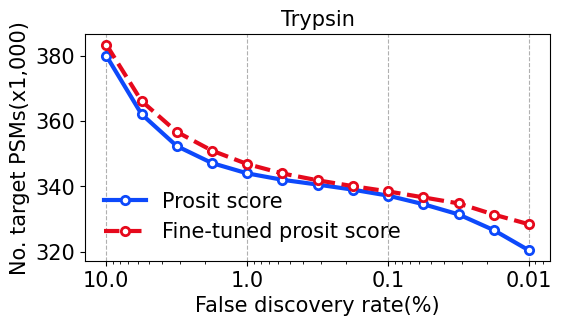

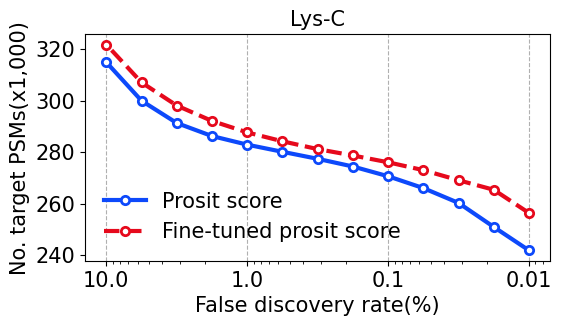

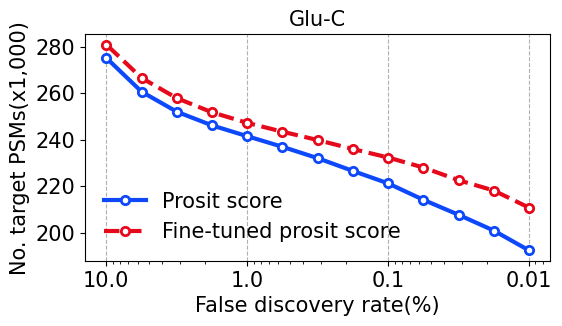

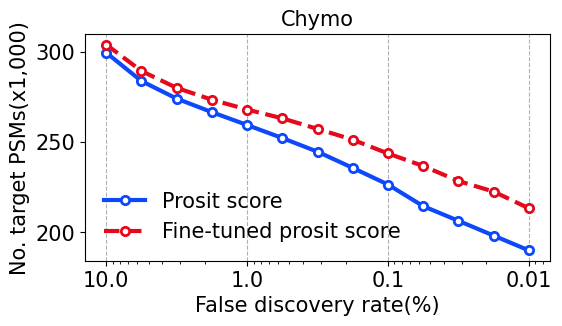

In [2]:
whichs = ['trypsin', "lysc", 'gluc', "chymo"]
for which, show in zip(whichs, ["Trypsin", "Lys-C", "Glu-C", "Chymo"]):
    frag_model = "prosit_l1"
    # result_dir = f"/data/yejb/prosit/figs/boosting/figs/Figure_5_{which}/percolator/{frag_model}_finetune"
    result_dir = f"/data/prosit/figs/fig235/{which}/percolator_up/try/{frag_model}"

    no_finetuned_dir = os.path.join(result_dir, "no_finetuned_twofold")
    # prosit_combined = pd.read_csv(os.path.join(no_finetuned_dir, "prosit_combined_target.psms"), sep='\t')
    prosit_best = pd.read_csv(os.path.join(no_finetuned_dir, "prosit_best_target.psms"), sep='\t')

    finetuned_dir = os.path.join(result_dir, "finetuned_twofold")
    # finetune_prosit_combined = pd.read_csv(os.path.join(finetuned_dir, "prosit_combined_target.psms"), sep='\t')
    finetune_prosit_best = pd.read_csv(os.path.join(
        finetuned_dir, "prosit_best_target.psms"), sep='\t')

    import matplotlib as mpl
    plt.style.use(['ieee', "high-vis",'no-latex'])
    plt.rcParams['svg.fonttype'] = 'none'
    plt.rcParams["font.family"] = "Times New Roman"

    fdr_to_show = [0.0001*(10**0.25)**i for i in range(0, 13)]
    nf_combined = []
    nf_best = []
    f_combined = []
    f_best = []

    scale = 1000
    # for fdr in fdr_to_show:
    #     nf_combined.append((prosit_combined['q-value'] < fdr).sum()/scale)
    for fdr in fdr_to_show:
        nf_best.append((prosit_best['q-value'] < fdr).sum()/scale)
    # for fdr in fdr_to_show:
    #     f_combined.append((finetune_prosit_combined['q-value'] < fdr).sum()/scale)
    for fdr in fdr_to_show:
        f_best.append((finetune_prosit_best['q-value'] < fdr).sum()/scale)

    fig, ax = plt.subplots(figsize=(6,3), dpi=100)
    ax.set_xscale('log')
    ax.invert_xaxis()
    fdr_to_plot = [i*100 for i in fdr_to_show]
    plt.ticklabel_format(axis='y', style='sci')
    # ax.grid()
    ax.xaxis.grid(linestyle='--')
    # plt.plot(fdr_to_plot, nf_combined, marker='o',label="prosit", linewidth=3)
    plt.plot(fdr_to_plot, nf_best, marker='o',label="Prosit score", linewidth=3,  markerfacecolor='w', markeredgewidth=2)
    # plt.plot(fdr_to_plot, f_combined, marker='o',label="finetuned prosit", linewidth=3)
    plt.plot(fdr_to_plot, f_best, marker='o', label="Fine-tuned prosit score", linewidth=3, markerfacecolor='w', markeredgewidth=2)

    ax.set_xlabel("False discovery rate(%)", fontsize=15)
    ax.set_ylabel("No. target PSMs(x1,000)", fontsize=15)
    ax.tick_params(axis='x', labelsize=15)
    ax.tick_params(axis='y', labelsize=15)
    ax.get_xaxis().set_major_formatter(mpl.ticker.FuncFormatter(lambda x, p: format(float(x), ',')))
    ax.legend(loc="lower left", prop={'size': 15}, frameon=False)
    ax.set_title(show, fontsize=15)
    fig.savefig(
        f"fig/fig2-prosit-fdr-{frag_model}-{which}.svg", dpi=300, bbox_inches="tight")


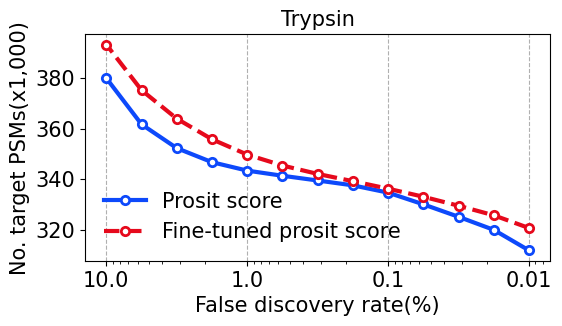

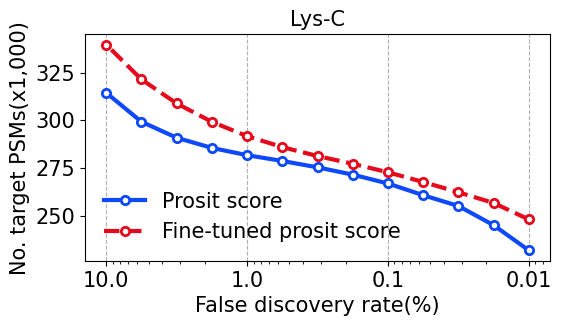

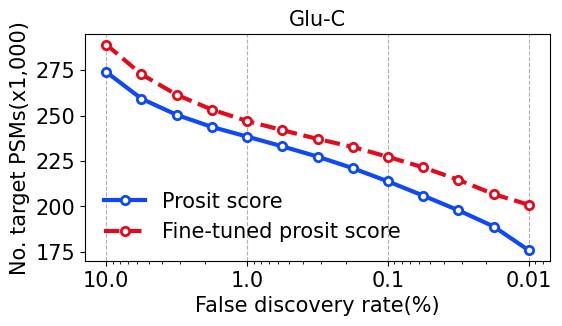

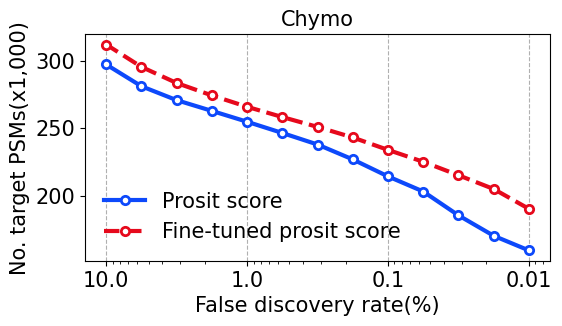

In [3]:
whichs = ['trypsin', "lysc", 'gluc', "chymo"]
for which, show in zip(whichs, ["Trypsin", "Lys-C", "Glu-C", "Chymo"]):
    frag_model = "pdeep2"
    # result_dir = f"/data/yejb/prosit/figs/boosting/figs/Figure_5_{which}/percolator/{frag_model}_finetune"
    result_dir = f"/data/prosit/figs/fig235/{which}/percolator_up/try/{frag_model}"

    no_finetuned_dir = os.path.join(result_dir, "no_finetuned_twofold")
    # prosit_combined = pd.read_csv(os.path.join(no_finetuned_dir, "prosit_combined_target.psms"), sep='\t')
    prosit_best = pd.read_csv(os.path.join(no_finetuned_dir, "prosit_best_target.psms"), sep='\t')

    finetuned_dir = os.path.join(result_dir, "finetuned_twofold")
    # finetune_prosit_combined = pd.read_csv(os.path.join(finetuned_dir, "prosit_combined_target.psms"), sep='\t')
    finetune_prosit_best = pd.read_csv(os.path.join(
        finetuned_dir, "prosit_best_target.psms"), sep='\t')

    import matplotlib as mpl
    plt.style.use(['ieee', "high-vis",'no-latex'])
    plt.rcParams["font.family"] = "Times New Roman"
    plt.rcParams['svg.fonttype'] = 'none'

    fdr_to_show = [0.0001*(10**0.25)**i for i in range(0, 13)]
    nf_combined = []
    nf_best = []
    f_combined = []
    f_best = []

    scale = 1000
    # for fdr in fdr_to_show:
    #     nf_combined.append((prosit_combined['q-value'] < fdr).sum()/scale)
    for fdr in fdr_to_show:
        nf_best.append((prosit_best['q-value'] < fdr).sum()/scale)
    # for fdr in fdr_to_show:
    #     f_combined.append((finetune_prosit_combined['q-value'] < fdr).sum()/scale)
    for fdr in fdr_to_show:
        f_best.append((finetune_prosit_best['q-value'] < fdr).sum()/scale)

    fig, ax = plt.subplots(figsize=(6,3), dpi=100)
    ax.set_xscale('log')
    ax.invert_xaxis()
    fdr_to_plot = [i*100 for i in fdr_to_show]
    plt.ticklabel_format(axis='y', style='sci')
    # ax.grid()
    ax.xaxis.grid(linestyle='--')
    # plt.plot(fdr_to_plot, nf_combined, marker='o',label="prosit", linewidth=3)
    plt.plot(fdr_to_plot, nf_best, marker='o',label="Prosit score", linewidth=3,  markerfacecolor='w', markeredgewidth=2)
    # plt.plot(fdr_to_plot, f_combined, marker='o',label="finetuned prosit", linewidth=3)
    plt.plot(fdr_to_plot, f_best, marker='o', label="Fine-tuned prosit score", linewidth=3, markerfacecolor='w', markeredgewidth=2)

    ax.set_xlabel("False discovery rate(%)", fontsize=15)
    ax.set_ylabel("No. target PSMs(x1,000)", fontsize=15)
    ax.tick_params(axis='x', labelsize=15)
    ax.tick_params(axis='y', labelsize=15)
    ax.get_xaxis().set_major_formatter(mpl.ticker.FuncFormatter(lambda x, p: format(float(x), ',')))
    ax.legend(loc="lower left", prop={'size': 15}, frameon=False)
    ax.set_title(show, fontsize=15)
    fig.savefig(
        f"fig/fig2-prosit-fdr-{frag_model}-{which}.svg", dpi=300, bbox_inches="tight")


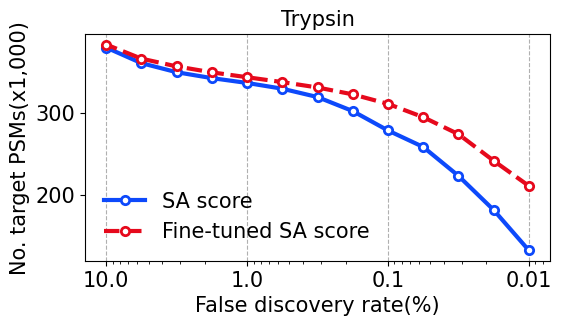

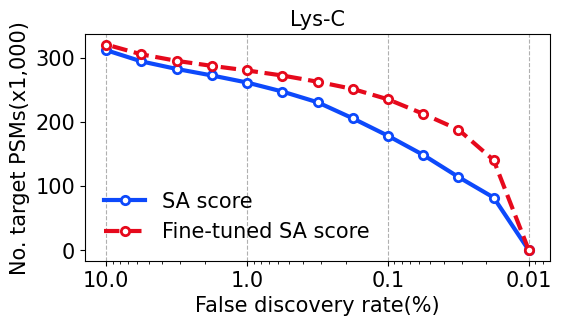

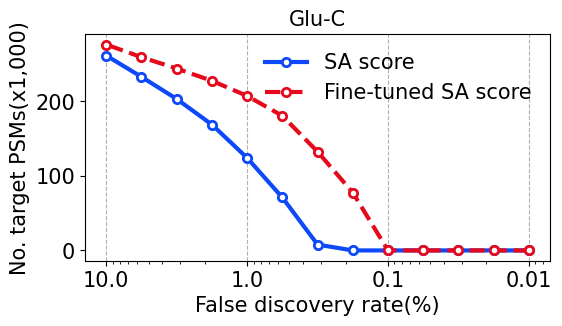

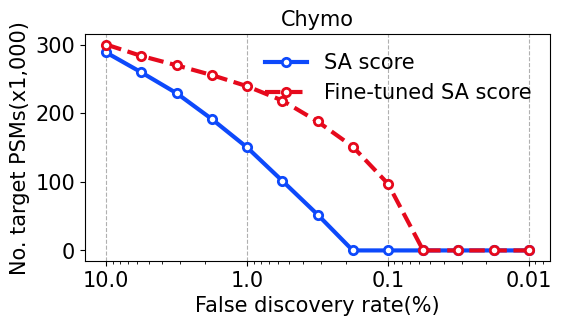

In [4]:
whichs = ['trypsin', "lysc", 'gluc', "chymo"]
for which, show in zip(whichs, ["Trypsin", "Lys-C", "Glu-C", "Chymo"]):
    frag_model = "prosit_l1"
    # result_dir = f"/data/yejb/prosit/figs/boosting/figs/Figure_5_{which}/percolator/{frag_model}_finetune"
    result_dir = f"/data/prosit/figs/fig235/{which}/percolator_up/try/{frag_model}"

    no_finetuned_dir = os.path.join(result_dir, "no_finetuned_twofold")
    # prosit_combined = pd.read_csv(os.path.join(no_finetuned_dir, "prosit_combined_target.psms"), sep='\t')
    prosit_best = pd.read_csv(os.path.join(
        no_finetuned_dir, "sa_target.psms"), sep='\t')

    finetuned_dir = os.path.join(result_dir, "finetuned_twofold")
    # finetune_prosit_combined = pd.read_csv(os.path.join(finetuned_dir, "prosit_combined_target.psms"), sep='\t')
    finetune_prosit_best = pd.read_csv(os.path.join(
        finetuned_dir, "sa_target.psms"), sep='\t')

    import matplotlib as mpl
    plt.style.use(['ieee', "high-vis", 'no-latex'])
    plt.rcParams["font.family"] = "Times New Roman"
    plt.rcParams['svg.fonttype'] = 'none'

    fdr_to_show = [0.0001 * (10**0.25)**i for i in range(0, 13)]
    nf_combined = []
    nf_best = []
    f_combined = []
    f_best = []

    scale = 1000
    # for fdr in fdr_to_show:
    #     nf_combined.append((prosit_combined['q-value'] < fdr).sum()/scale)
    for fdr in fdr_to_show:
        nf_best.append((prosit_best['q-value'] < fdr).sum() / scale)
    # for fdr in fdr_to_show:
    #     f_combined.append((finetune_prosit_combined['q-value'] < fdr).sum()/scale)
    for fdr in fdr_to_show:
        f_best.append((finetune_prosit_best['q-value'] < fdr).sum() / scale)

    fig, ax = plt.subplots(figsize=(6, 3), dpi=100)
    ax.set_xscale('log')
    ax.invert_xaxis()
    fdr_to_plot = [i * 100 for i in fdr_to_show]
    plt.ticklabel_format(axis='y', style='sci')
    # ax.grid()
    ax.xaxis.grid(linestyle='--')
    # plt.plot(fdr_to_plot, nf_combined, marker='o',label="prosit", linewidth=3)
    plt.plot(fdr_to_plot, nf_best, marker='o', label="SA score",
             linewidth=3, markerfacecolor='w', markeredgewidth=2)
    # plt.plot(fdr_to_plot, f_combined, marker='o',label="finetuned prosit", linewidth=3)
    plt.plot(fdr_to_plot, f_best, marker='o', label="Fine-tuned SA score",
             linewidth=3, markerfacecolor='w', markeredgewidth=2)

    ax.set_xlabel("False discovery rate(%)", fontsize=15)
    ax.set_ylabel("No. target PSMs(x1,000)", fontsize=15)
    ax.tick_params(axis='x', labelsize=15)
    ax.tick_params(axis='y', labelsize=15)
    ax.get_xaxis().set_major_formatter(
        mpl.ticker.FuncFormatter(lambda x, p: format(float(x), ',')))
    ax.legend(prop={'size': 15}, frameon=False)
    ax.set_title(show, fontsize=15)
    fig.savefig(
        f"fig/fig2-sa-fdr-{frag_model}-{which}.svg", dpi=300, bbox_inches="tight")


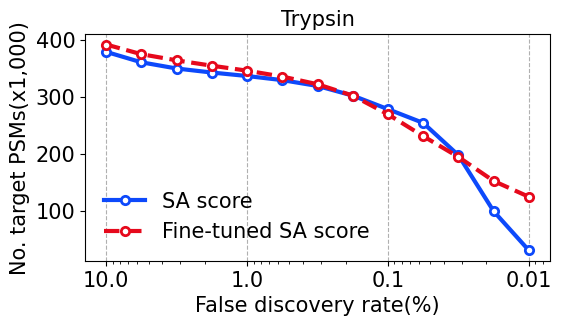

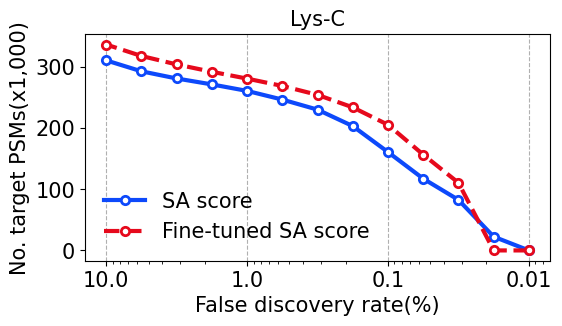

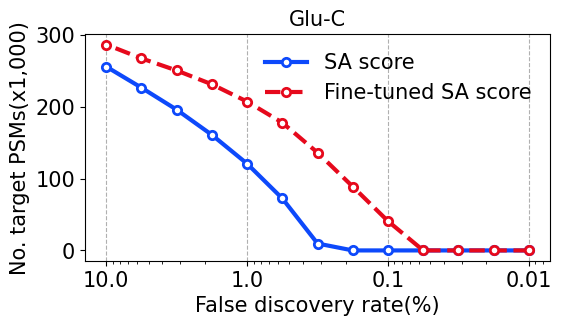

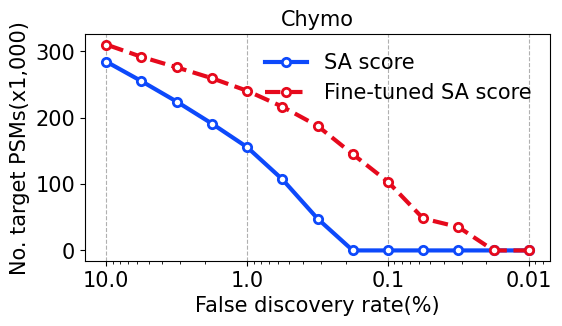

In [5]:
whichs = ['trypsin', "lysc", 'gluc', "chymo"]
for which, show in zip(whichs, ["Trypsin", "Lys-C", "Glu-C", "Chymo"]):
    frag_model = "pdeep2"
    # result_dir = f"/data/yejb/prosit/figs/boosting/figs/Figure_5_{which}/percolator/{frag_model}_finetune"
    result_dir = f"/data/prosit/figs/fig235/{which}/percolator_up/try/{frag_model}"

    no_finetuned_dir = os.path.join(result_dir, "no_finetuned_twofold")
    # prosit_combined = pd.read_csv(os.path.join(no_finetuned_dir, "prosit_combined_target.psms"), sep='\t')
    prosit_best = pd.read_csv(os.path.join(
        no_finetuned_dir, "sa_target.psms"), sep='\t')

    finetuned_dir = os.path.join(result_dir, "finetuned_twofold")
    # finetune_prosit_combined = pd.read_csv(os.path.join(finetuned_dir, "prosit_combined_target.psms"), sep='\t')
    finetune_prosit_best = pd.read_csv(os.path.join(
        finetuned_dir, "sa_target.psms"), sep='\t')

    import matplotlib as mpl
    plt.style.use(['ieee', "high-vis", 'no-latex'])
    plt.rcParams["font.family"] = "Times New Roman"
    plt.rcParams['svg.fonttype'] = 'none'

    fdr_to_show = [0.0001 * (10**0.25)**i for i in range(0, 13)]
    nf_combined = []
    nf_best = []
    f_combined = []
    f_best = []

    scale = 1000
    # for fdr in fdr_to_show:
    #     nf_combined.append((prosit_combined['q-value'] < fdr).sum()/scale)
    for fdr in fdr_to_show:
        nf_best.append((prosit_best['q-value'] < fdr).sum() / scale)
    # for fdr in fdr_to_show:
    #     f_combined.append((finetune_prosit_combined['q-value'] < fdr).sum()/scale)
    for fdr in fdr_to_show:
        f_best.append((finetune_prosit_best['q-value'] < fdr).sum() / scale)

    fig, ax = plt.subplots(figsize=(6, 3), dpi=100)
    ax.set_xscale('log')
    ax.invert_xaxis()
    fdr_to_plot = [i * 100 for i in fdr_to_show]
    plt.ticklabel_format(axis='y', style='sci')
    # ax.grid()
    ax.xaxis.grid(linestyle='--')
    # plt.plot(fdr_to_plot, nf_combined, marker='o',label="prosit", linewidth=3)
    plt.plot(fdr_to_plot, nf_best, marker='o', label="SA score",
             linewidth=3, markerfacecolor='w', markeredgewidth=2)
    # plt.plot(fdr_to_plot, f_combined, marker='o',label="finetuned prosit", linewidth=3)
    plt.plot(fdr_to_plot, f_best, marker='o', label="Fine-tuned SA score",
             linewidth=3, markerfacecolor='w', markeredgewidth=2)

    ax.set_xlabel("False discovery rate(%)", fontsize=15)
    ax.set_ylabel("No. target PSMs(x1,000)", fontsize=15)
    ax.tick_params(axis='x', labelsize=15)
    ax.tick_params(axis='y', labelsize=15)
    ax.get_xaxis().set_major_formatter(
        mpl.ticker.FuncFormatter(lambda x, p: format(float(x), ',')))
    ax.legend(prop={'size': 15}, frameon=False)
    ax.set_title(show, fontsize=15)
    fig.savefig(
        f"fig/fig2-sa-fdr-{frag_model}-{which}.svg", dpi=300, bbox_inches="tight")
